In [109]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from synthetic import simulate_lorenz_96
from models import crnn_mimic, crnn_simple_mimic 

In [111]:
device = torch.device('cuda')
crnn = torch.load('crnnmimic.pt',map_location='cuda:0').cuda(device=device)

In [112]:
crnn.GC()

tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]], device='cuda:0', dtype=torch.int32)

In [113]:
torch.argmax(crnn.GC(threshold = False), dim=1)

tensor([286, 275, 241, 315, 326, 328, 110, 326, 110, 114, 270, 220],
       device='cuda:0')

In [118]:
torch.max(crnn.GC(threshold = False), dim=1)

torch.return_types.max(
values=tensor([0.7980, 0.6752, 0.6889, 0.6661, 0.6509, 0.7092, 0.6600, 0.6782, 0.6604,
        0.6402, 0.5902, 0.8015], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([286, 275, 241, 315, 326, 328, 110, 326, 110, 114, 270, 220],
       device='cuda:0'))

In [119]:
# Verify learned Granger causality
GC_est = crnn.GC(threshold = False).cpu().data.numpy()


In [120]:
import pandas as pd
df = pd.DataFrame(GC_est)

In [121]:
df

,0,1,2,3,4,5,6,7,8,9,...,320,321,322,323,324,325,326,327,328,329
0,0.510433,0.164561,0.196020,0.534413,0.124245,0.534080,0.532483,0.059130,0.525075,0.496066,...,0.242910,0.370255,0.252027,0.478394,0.526355,0.528359,0.529269,0.490407,0.448319,0.456373
1,0.456960,0.087290,0.121724,0.470277,0.074205,0.464546,0.506620,0.052331,0.448712,0.478824,...,0.188294,0.393858,0.242351,0.441473,0.515497,0.460456,0.571398,0.518014,0.560775,0.581216
2,0.537619,0.223666,0.404077,0.538198,0.198306,0.518697,0.617060,0.088027,0.494947,0.565967,...,0.449399,0.493522,0.528936,0.549063,0.561144,0.626327,0.525021,0.556234,0.600098,0.641587
3,0.490815,0.200230,0.169690,0.545326,0.191273,0.470181,0.582793,0.059157,0.492930,0.561513,...,0.366434,0.525105,0.373466,0.540236,0.577425,0.605940,0.570493,0.539178,0.556395,0.587852
4,0.534939,0.208530,0.229182,0.513326,0.226544,0.532717,0.530324,0.061196,0.501924,0.577513,...,0.375833,0.389554,0.313304,0.517493,0.555594,0.496685,0.650911,0.588095,0.591000,0.583657
5,0.541296,0.151438,0.286569,0.522784,0.101008,0.533476,0.567247,0.053435,0.462402,0.531608,...,0.518447,0.425824,0.513721,0.518067,0.547304,0.659321,0.544052,0.570631,0.709242,0.468016
6,0.514536,0.157048,0.202139,0.574603,0.138166,0.556829,0.547316,0.055832,0.491275,0.529001,...,0.278834,0.417641,0.357921,0.507541,0.533043,0.536094,0.530093,0.565728,0.494955,0.494118
7,0.478858,0.091536,0.135319,0.507961,0.068806,0.483823,0.540447,0.061157,0.441796,0.531560,...,0.245498,0.494859,0.370491,0.481482,0.539736,0.510921,0.678236,0.558605,0.477655,0.596991
8,0.533409,0.230552,0.422762,0.562216,0.150640,0.545496,0.582676,0.059651,0.476743,0.581306,...,0.338874,0.495651,0.398037,0.508728,0.538777,0.505219,0.518750,0.583442,0.566391,0.607735
9,0.556799,0.325256,0.191433,0.563032,0.256314,0.537880,0.554741,0.130055,0.508362,0.544627,...,0.537708,0.485963,0.449365,0.532983,0.563268,0.580263,0.637273,0.538271,0.530066,0.590051


In [122]:
df.columns

RangeIndex(start=0, stop=330, step=1)

In [123]:
df_test = pd.read_csv('X_merge.csv')

In [124]:
x_list = list(df_test.iloc[:, 4:].columns)

In [125]:
df_y_test = pd.read_csv('y_merge.csv')

In [126]:
y_list = list(df_y_test.iloc[:, 4:].columns)

In [127]:
x_list

['absolute_time',
 'alanine aminotransferase',
 'alanine aminotransferase.1',
 'alanine aminotransferase.2',
 'albumin',
 'albumin.1',
 'albumin.2',
 'albumin ascites',
 'albumin ascites.1',
 'albumin ascites.2',
 'albumin pleural',
 'albumin pleural.1',
 'albumin pleural.2',
 'albumin urine',
 'albumin urine.1',
 'albumin urine.2',
 'alkaline phosphate',
 'alkaline phosphate.1',
 'alkaline phosphate.2',
 'anion gap',
 'anion gap.1',
 'anion gap.2',
 'asparate aminotransferase',
 'asparate aminotransferase.1',
 'asparate aminotransferase.2',
 'basophils',
 'basophils.1',
 'basophils.2',
 'bicarbonate',
 'bicarbonate.1',
 'bicarbonate.2',
 'bilirubin',
 'bilirubin.1',
 'bilirubin.2',
 'blood urea nitrogen',
 'blood urea nitrogen.1',
 'blood urea nitrogen.2',
 'calcium',
 'calcium.1',
 'calcium.2',
 'calcium ionized',
 'calcium ionized.1',
 'calcium ionized.2',
 'calcium urine',
 'calcium urine.1',
 'calcium urine.2',
 'cardiac index',
 'cardiac index.1',
 'cardiac index.2',
 'cardiac ou

In [128]:
y_list

['vent',
 'vaso',
 'dobutamine',
 'dopamine',
 'epinephrine',
 'milrinone',
 'norepinephrine',
 'phenylephrine',
 'vasopressin',
 'colloid_bolus',
 'crystalloid_bolus',
 'nivdurations']

In [129]:
len(x_list)

330

In [130]:
df.columns= x_list

In [131]:
df

,absolute_time,alanine aminotransferase,alanine aminotransferase.1,alanine aminotransferase.2,albumin,albumin.1,albumin.2,albumin ascites,albumin ascites.1,albumin ascites.2,...,ethnicity_ASIAN,ethnicity_BLACK,ethnicity_HISPANIC/LATINO,ethnicity_OTHER,ethnicity_WHITE,first_careunit_CCU,first_careunit_CSRU,first_careunit_MICU,first_careunit_SICU,first_careunit_TSICU
0,0.510433,0.164561,0.196020,0.534413,0.124245,0.534080,0.532483,0.059130,0.525075,0.496066,...,0.242910,0.370255,0.252027,0.478394,0.526355,0.528359,0.529269,0.490407,0.448319,0.456373
1,0.456960,0.087290,0.121724,0.470277,0.074205,0.464546,0.506620,0.052331,0.448712,0.478824,...,0.188294,0.393858,0.242351,0.441473,0.515497,0.460456,0.571398,0.518014,0.560775,0.581216
2,0.537619,0.223666,0.404077,0.538198,0.198306,0.518697,0.617060,0.088027,0.494947,0.565967,...,0.449399,0.493522,0.528936,0.549063,0.561144,0.626327,0.525021,0.556234,0.600098,0.641587
3,0.490815,0.200230,0.169690,0.545326,0.191273,0.470181,0.582793,0.059157,0.492930,0.561513,...,0.366434,0.525105,0.373466,0.540236,0.577425,0.605940,0.570493,0.539178,0.556395,0.587852
4,0.534939,0.208530,0.229182,0.513326,0.226544,0.532717,0.530324,0.061196,0.501924,0.577513,...,0.375833,0.389554,0.313304,0.517493,0.555594,0.496685,0.650911,0.588095,0.591000,0.583657
5,0.541296,0.151438,0.286569,0.522784,0.101008,0.533476,0.567247,0.053435,0.462402,0.531608,...,0.518447,0.425824,0.513721,0.518067,0.547304,0.659321,0.544052,0.570631,0.709242,0.468016
6,0.514536,0.157048,0.202139,0.574603,0.138166,0.556829,0.547316,0.055832,0.491275,0.529001,...,0.278834,0.417641,0.357921,0.507541,0.533043,0.536094,0.530093,0.565728,0.494955,0.494118
7,0.478858,0.091536,0.135319,0.507961,0.068806,0.483823,0.540447,0.061157,0.441796,0.531560,...,0.245498,0.494859,0.370491,0.481482,0.539736,0.510921,0.678236,0.558605,0.477655,0.596991
8,0.533409,0.230552,0.422762,0.562216,0.150640,0.545496,0.582676,0.059651,0.476743,0.581306,...,0.338874,0.495651,0.398037,0.508728,0.538777,0.505219,0.518750,0.583442,0.566391,0.607735
9,0.556799,0.325256,0.191433,0.563032,0.256314,0.537880,0.554741,0.130055,0.508362,0.544627,...,0.537708,0.485963,0.449365,0.532983,0.563268,0.580263,0.637273,0.538271,0.530066,0.590051


In [133]:
df.index = y_list

In [134]:
df

,absolute_time,alanine aminotransferase,alanine aminotransferase.1,alanine aminotransferase.2,albumin,albumin.1,albumin.2,albumin ascites,albumin ascites.1,albumin ascites.2,...,ethnicity_ASIAN,ethnicity_BLACK,ethnicity_HISPANIC/LATINO,ethnicity_OTHER,ethnicity_WHITE,first_careunit_CCU,first_careunit_CSRU,first_careunit_MICU,first_careunit_SICU,first_careunit_TSICU
vent,0.510433,0.164561,0.196020,0.534413,0.124245,0.534080,0.532483,0.059130,0.525075,0.496066,...,0.242910,0.370255,0.252027,0.478394,0.526355,0.528359,0.529269,0.490407,0.448319,0.456373
vaso,0.456960,0.087290,0.121724,0.470277,0.074205,0.464546,0.506620,0.052331,0.448712,0.478824,...,0.188294,0.393858,0.242351,0.441473,0.515497,0.460456,0.571398,0.518014,0.560775,0.581216
dobutamine,0.537619,0.223666,0.404077,0.538198,0.198306,0.518697,0.617060,0.088027,0.494947,0.565967,...,0.449399,0.493522,0.528936,0.549063,0.561144,0.626327,0.525021,0.556234,0.600098,0.641587
dopamine,0.490815,0.200230,0.169690,0.545326,0.191273,0.470181,0.582793,0.059157,0.492930,0.561513,...,0.366434,0.525105,0.373466,0.540236,0.577425,0.605940,0.570493,0.539178,0.556395,0.587852
epinephrine,0.534939,0.208530,0.229182,0.513326,0.226544,0.532717,0.530324,0.061196,0.501924,0.577513,...,0.375833,0.389554,0.313304,0.517493,0.555594,0.496685,0.650911,0.588095,0.591000,0.583657
milrinone,0.541296,0.151438,0.286569,0.522784,0.101008,0.533476,0.567247,0.053435,0.462402,0.531608,...,0.518447,0.425824,0.513721,0.518067,0.547304,0.659321,0.544052,0.570631,0.709242,0.468016
norepinephrine,0.514536,0.157048,0.202139,0.574603,0.138166,0.556829,0.547316,0.055832,0.491275,0.529001,...,0.278834,0.417641,0.357921,0.507541,0.533043,0.536094,0.530093,0.565728,0.494955,0.494118
phenylephrine,0.478858,0.091536,0.135319,0.507961,0.068806,0.483823,0.540447,0.061157,0.441796,0.531560,...,0.245498,0.494859,0.370491,0.481482,0.539736,0.510921,0.678236,0.558605,0.477655,0.596991
vasopressin,0.533409,0.230552,0.422762,0.562216,0.150640,0.545496,0.582676,0.059651,0.476743,0.581306,...,0.338874,0.495651,0.398037,0.508728,0.538777,0.505219,0.518750,0.583442,0.566391,0.607735
colloid_bolus,0.556799,0.325256,0.191433,0.563032,0.256314,0.537880,0.554741,0.130055,0.508362,0.544627,...,0.537708,0.485963,0.449365,0.532983,0.563268,0.580263,0.637273,0.538271,0.530066,0.590051


In [135]:
import seaborn as sns

<AxesSubplot:>

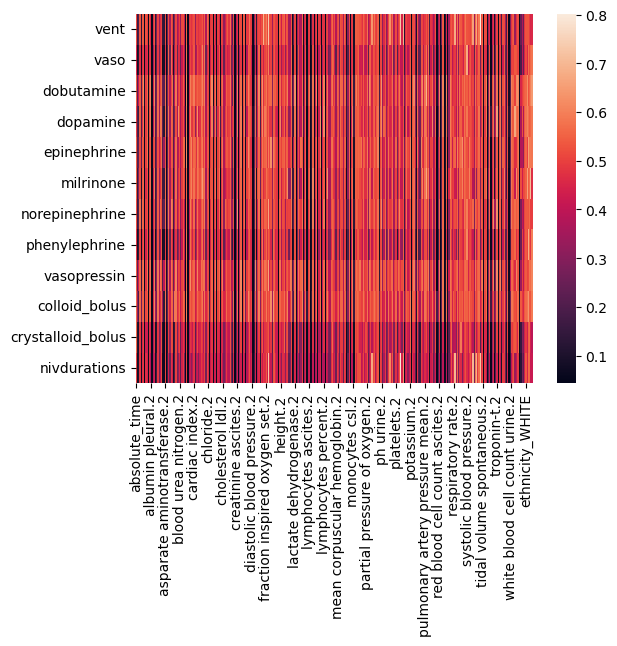

In [136]:
sns.heatmap(data=df)

In [142]:
df.T.nlargest(200, 'vaso').loc[:, 'vaso']

systolic blood pressure.1               0.675183
central venous pressure                 0.604736
glascow coma scale total.1              0.603630
first_careunit_TSICU                    0.581216
pulmonary artery pressure systolic.2    0.579083
                                          ...   
calcium.1                               0.413955
pulmonary capillary wedge pressure.1    0.413904
pulmonary artery pressure systolic.1    0.413315
partial pressure of oxygen              0.412745
positive end-expiratory pressure set    0.409828
Name: vaso, Length: 200, dtype: float32

In [139]:
df.T.nlargest(20, 'vent').loc[:, 'vent']

tidal volume spontaneous                  0.797958
glascow coma scale total.1                0.733231
positive end-expiratory pressure set      0.731042
fraction inspired oxygen set              0.691356
positive end-expiratory pressure set.2    0.680506
respiratory rate set                      0.674746
tidal volume set                          0.669198
tidal volume observed                     0.657609
peak inspiratory pressure                 0.636089
plateau pressure                          0.632263
fraction inspired oxygen set.2            0.599728
tidal volume set.2                        0.593140
systolic blood pressure                   0.587717
partial pressure of oxygen.2              0.578588
diastolic blood pressure                  0.578029
peak inspiratory pressure.2               0.577983
co2 (etco2, pco2, etc.).2                 0.577333
respiratory rate set.2                    0.575079
tidal volume observed.2                   0.570072
plateau pressure.2             

In [103]:
crnn.networks[0].rnn.weight_ih_l0.shape

torch.Size([300, 330])

In [76]:
crnn.networks[0].rnn.weight_ih_l0[0]

tensor([-1.1061e-06, -6.5609e-05,  5.4286e-05,  1.3189e-04,  2.1447e-05,
         5.0931e-05, -2.0205e-04, -1.3050e-07,  1.1249e-05,  7.8239e-05,
        -1.5552e-06,  6.3999e-06, -8.8119e-05,  1.5598e-07,  4.1452e-05,
        -4.2089e-04,  9.0983e-05, -6.5912e-05,  2.1141e-04,  5.6595e-05,
         3.5425e-06, -5.9138e-05, -1.5841e-04,  1.5259e-05,  1.1140e-04,
        -4.1839e-05,  5.4589e-05,  1.6095e-04, -5.1442e-05,  2.0365e-05,
        -2.1432e-04,  4.6625e-06, -3.5321e-05,  3.7655e-04,  1.3770e-05,
        -6.4243e-05, -3.3909e-04,  1.8654e-08,  5.7473e-05,  6.6501e-05,
        -1.1149e-04,  3.4018e-05,  1.2554e-04,  3.4288e-05,  1.2070e-04,
         3.7460e-04,  4.5827e-05,  2.6159e-05, -5.8607e-04,  1.6678e-06,
         2.1035e-05, -3.2222e-04,  7.6128e-05, -2.9811e-05, -5.9481e-04,
         7.6447e-05,  4.6358e-05,  3.3182e-04,  6.6378e-06, -2.5937e-06,
         1.2507e-04,  2.2495e-05,  4.8991e-05,  8.3550e-05, -2.5483e-06,
         3.9550e-05,  4.4905e-05, -4.9039e-05,  3.3

In [145]:
torch.empty(32, 5, dtype=torch.long).random_(10)

tensor([[6, 8, 2, 5, 5],
        [1, 0, 1, 9, 5],
        [9, 2, 6, 1, 1],
        [9, 3, 4, 2, 6],
        [0, 0, 1, 4, 6],
        [4, 6, 8, 6, 6],
        [1, 9, 1, 7, 0],
        [1, 3, 7, 2, 4],
        [1, 8, 9, 7, 5],
        [4, 3, 5, 2, 7],
        [3, 8, 2, 2, 4],
        [3, 4, 5, 8, 5],
        [5, 0, 7, 8, 1],
        [0, 1, 7, 5, 1],
        [0, 9, 9, 9, 6],
        [0, 9, 3, 2, 5],
        [7, 5, 0, 6, 1],
        [5, 5, 0, 9, 3],
        [2, 3, 9, 7, 1],
        [9, 6, 8, 3, 5],
        [4, 6, 4, 9, 9],
        [2, 8, 8, 5, 4],
        [2, 4, 2, 4, 8],
        [9, 6, 4, 8, 6],
        [7, 6, 9, 7, 4],
        [9, 5, 9, 3, 2],
        [6, 6, 8, 7, 1],
        [7, 9, 0, 8, 0],
        [7, 0, 7, 2, 9],
        [4, 1, 3, 1, 5],
        [4, 5, 4, 1, 9],
        [5, 8, 5, 1, 8]])